# Netflix Content Analysis - Exploratory Data Analysis
**Author:** Meghana PS
**Date:** January 2026  
**Dataset:** Netflix Movies and TV Shows (8,807 titles)

## Project Overview
This project analyzes Netflix's content catalog to uncover insights about content trends, genre preferences, country-wise production, and viewing patterns. The analysis explores:
- Content type distribution (Movies vs TV Shows)
- Trends in content additions over time
- Top contributing countries and directors
- Genre analysis and popularity
- Content ratings and target audiences
- Seasonal release patterns

## 1. Import Libraries and Load Data

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional utilities
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [3]:
# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

print(f"Dataset loaded successfully!")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")

Dataset loaded successfully!
Total records: 8,807
Total features: 12


## 2. Data Understanding and Initial Exploration

In [4]:
# Display first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Dataset information
print("\n=== Dataset Info ===")
df.info()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Statistical summary
print("\n=== Statistical Summary ===")
df.describe(include='all')


=== Statistical Summary ===


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values
print("\n=== Missing Values Analysis ===")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)


=== Missing Values Analysis ===
       Column  Missing_Count  Missing_Percentage
3    director           2634               29.91
5     country            831                9.44
4        cast            825                9.37
6  date_added             10                0.11
8      rating              4                0.05
9    duration              3                0.03


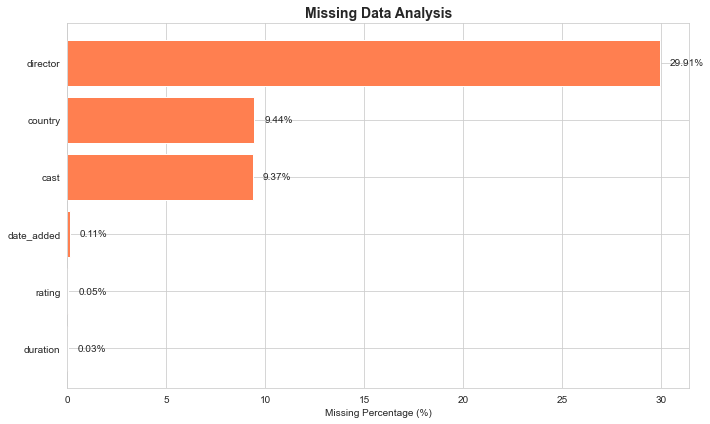

In [8]:
# Visualize missing data
plt.figure(figsize=(10, 6))
missing_cols = missing_data['Column'].tolist()
missing_pct = missing_data['Missing_Percentage'].tolist()

plt.barh(missing_cols, missing_pct, color='coral')
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Data Analysis', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(missing_pct):
    plt.text(v + 0.5, i, f'{v}%', va='center')
plt.tight_layout()
plt.savefig('../images/missing_data.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Data Cleaning and Preprocessing

In [9]:
# Create a copy for cleaning
df_clean = df.copy()

# Convert date_added to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Extract year and month added
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['month_name'] = df_clean['date_added'].dt.month_name()

# Fill missing values for categorical columns
df_clean['director'] = df_clean['director'].fillna('Unknown')
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['rating'] = df_clean['rating'].fillna('Not Rated')

# Extract duration in minutes for movies and seasons for TV shows
df_clean['duration_value'] = df_clean['duration'].str.extract('(\d+)').astype(float)
df_clean['duration_unit'] = df_clean['duration'].str.extract('([a-zA-Z]+)')

print("Data cleaning completed!")
print(f"Rows after cleaning: {df_clean.shape[0]}")

Data cleaning completed!
Rows after cleaning: 8807


## 4. Content Type Analysis

In [10]:
# Content type distribution
content_type = df_clean['type'].value_counts()
print("\n=== Content Type Distribution ===")
print(content_type)
print(f"\nMovies: {content_type['Movie'] / len(df_clean) * 100:.1f}%")
print(f"TV Shows: {content_type['TV Show'] / len(df_clean) * 100:.1f}%")


=== Content Type Distribution ===
Movie      6131
TV Show    2676
Name: type, dtype: int64

Movies: 69.6%
TV Shows: 30.4%


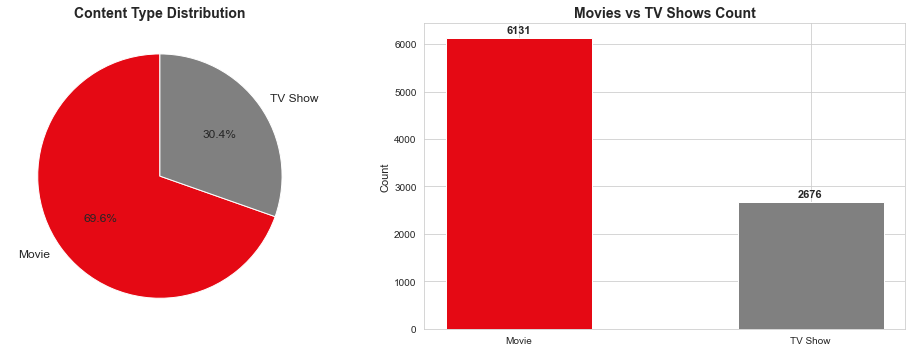

In [25]:
# Visualize content type distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#E50914', '#808080']
axes[0].pie(content_type.values, labels=content_type.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[0].set_title('Content Type Distribution', fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(content_type.index, content_type.values, color=colors, width=0.5)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_title('Movies vs TV Shows Count', fontsize=14, fontweight='bold')
for i, v in enumerate(content_type.values):
    axes[1].text(i, v + 100, str(v), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/content_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Temporal Analysis - Content Addition Trends

<Figure size 1008x432 with 0 Axes>

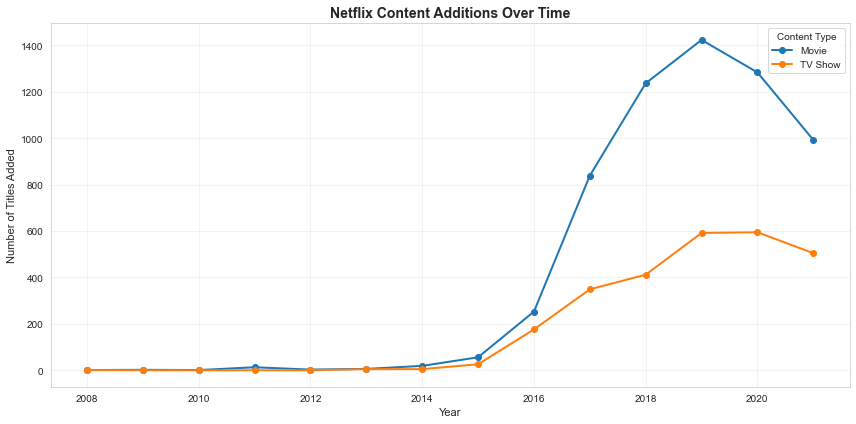


Peak content addition year: 2019 with 2016 titles


In [12]:
# Yearly trend of content additions
yearly_content = df_clean.dropna(subset=['year_added']).groupby(['year_added', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
yearly_content.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Netflix Content Additions Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Titles Added', fontsize=11)
plt.legend(title='Content Type', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../images/yearly_content_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# Find peak year
peak_year = yearly_content.sum(axis=1).idxmax()
peak_count = yearly_content.sum(axis=1).max()
print(f"\nPeak content addition year: {int(peak_year)} with {int(peak_count)} titles")

<Figure size 1008x432 with 0 Axes>

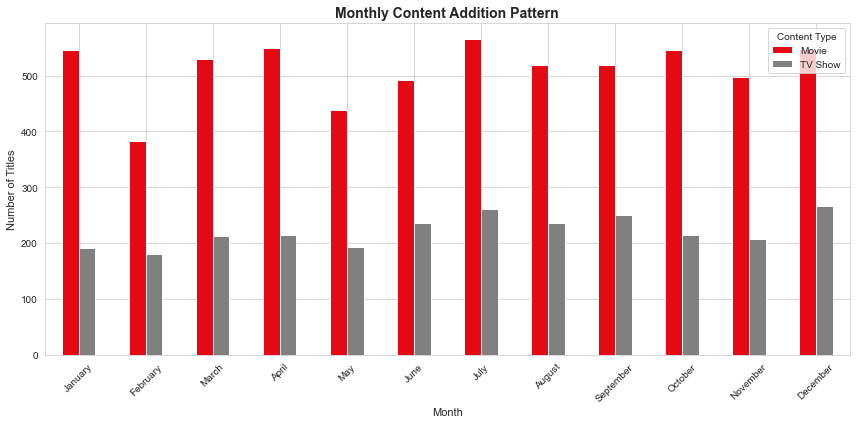

In [26]:
# Monthly addition pattern
monthly_content = df_clean.dropna(subset=['month_added']).groupby('month_name')['type'].value_counts().unstack(fill_value=0)

# Reorder months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_content = monthly_content.reindex([m for m in month_order if m in monthly_content.index])

plt.figure(figsize=(14, 6))
monthly_content.plot(kind='bar', stacked=False, color=['#E50914', '#808080'])
plt.title('Monthly Content Addition Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=11)
plt.ylabel('Number of Titles', fontsize=11)
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('../images/monthly_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Geographic Analysis - Content by Country

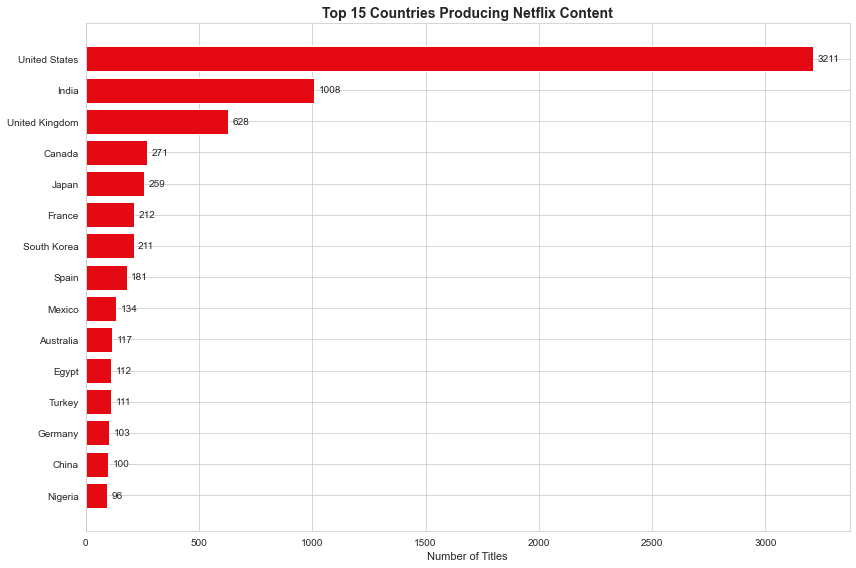


Top 5 Content Producing Countries:
United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
Name: primary_country, dtype: int64


In [14]:
# Extract first country (primary production country)
df_clean['primary_country'] = df_clean['country'].str.split(',').str[0].str.strip()

# Top 15 countries producing content
top_countries = df_clean[df_clean['primary_country'] != 'Unknown']['primary_country'].value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(top_countries.index, top_countries.values, color='#E50914')
plt.xlabel('Number of Titles', fontsize=11)
plt.title('Top 15 Countries Producing Netflix Content', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_countries.values):
    plt.text(v + 20, i, str(v), va='center', fontsize=10)
plt.tight_layout()
plt.savefig('../images/top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTop 5 Content Producing Countries:")
print(top_countries.head())

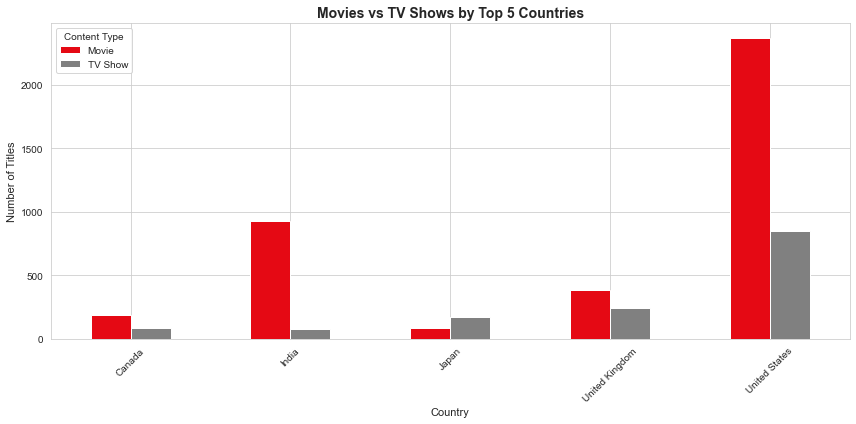

In [27]:
# Content type by top countries
top_5_countries = top_countries.head(5).index.tolist()
country_type = df_clean[df_clean['primary_country'].isin(top_5_countries)].groupby(['primary_country', 'type']).size().unstack()

country_type.plot(kind='bar', figsize=(12, 6), color=['#E50914', '#808080'])
plt.title('Movies vs TV Shows by Top 5 Countries', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=11)
plt.ylabel('Number of Titles', fontsize=11)
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('../images/country_content_type.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Content Rating Analysis

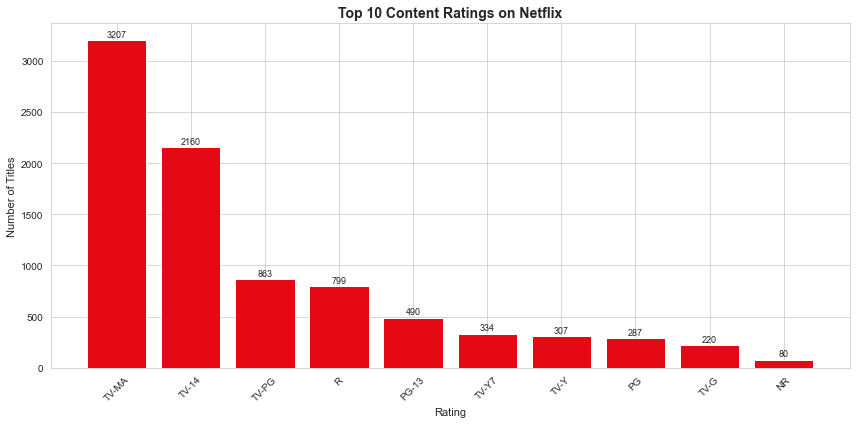


=== Content Rating Distribution ===
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64


In [16]:
# Rating distribution
rating_dist = df_clean['rating'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(rating_dist.index, rating_dist.values, color='#E50914')
plt.title('Top 10 Content Ratings on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=11)
plt.ylabel('Number of Titles', fontsize=11)
plt.xticks(rotation=45)
for i, v in enumerate(rating_dist.values):
    plt.text(i, v + 30, str(v), ha='center', fontsize=9)
plt.tight_layout()
plt.savefig('../images/content_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Content Rating Distribution ===")
print(rating_dist)

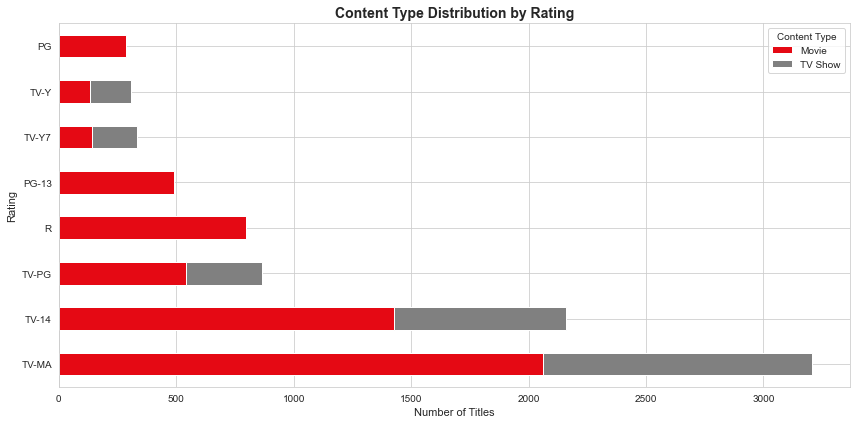

In [28]:
# Rating by content type
rating_by_type = df_clean.groupby(['rating', 'type']).size().unstack(fill_value=0)
top_ratings = rating_dist.head(8).index.tolist()
rating_by_type_top = rating_by_type.loc[top_ratings]

rating_by_type_top.plot(kind='barh', stacked=True, figsize=(12, 6), color=['#E50914', '#808080'])
plt.title('Content Type Distribution by Rating', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=11)
plt.ylabel('Rating', fontsize=11)
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('../images/rating_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Genre Analysis

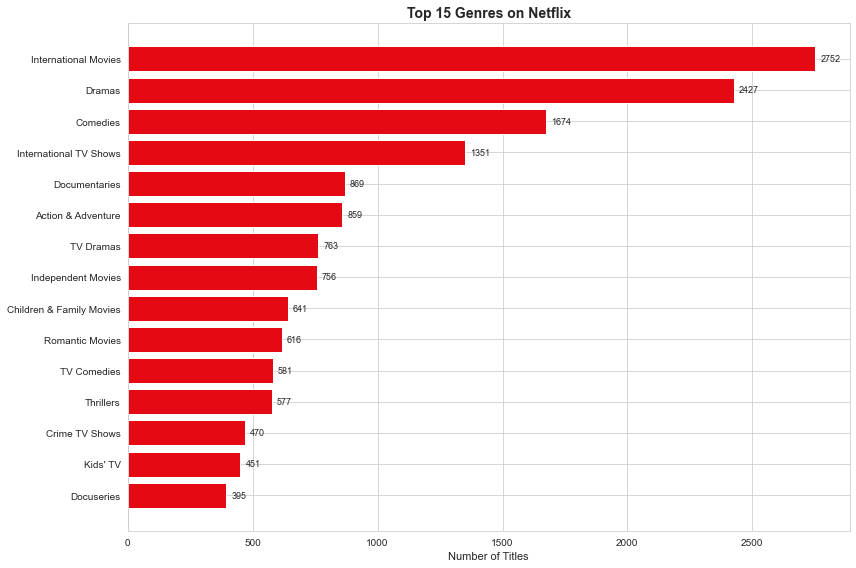


=== Top 10 Genres ===
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64


In [18]:
# Extract and analyze genres
from collections import Counter

# Split genres and count
all_genres = df_clean['listed_in'].str.split(', ').explode()
genre_counts = all_genres.value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(genre_counts.index, genre_counts.values, color='#E50914')
plt.xlabel('Number of Titles', fontsize=11)
plt.title('Top 15 Genres on Netflix', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(genre_counts.values):
    plt.text(v + 20, i, str(v), va='center', fontsize=9)
plt.tight_layout()
plt.savefig('../images/top_genres.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Top 10 Genres ===")
print(genre_counts.head(10))

## 9. Duration Analysis

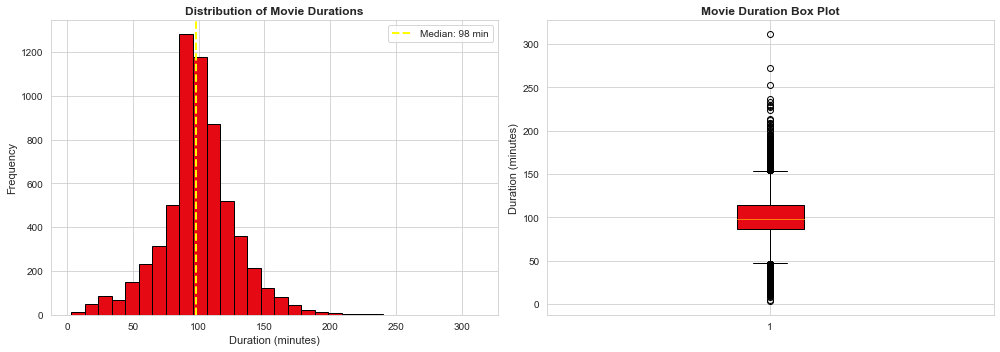


=== Movie Duration Statistics ===
Average: 99.6 minutes
Median: 98 minutes
Shortest: 3 minutes
Longest: 312 minutes


In [19]:
# Movie duration analysis
movies_df = df_clean[df_clean['type'] == 'Movie'].copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of movie durations
axes[0].hist(movies_df['duration_value'].dropna(), bins=30, color='#E50914', edgecolor='black')
axes[0].set_xlabel('Duration (minutes)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Movie Durations', fontsize=12, fontweight='bold')
axes[0].axvline(movies_df['duration_value'].median(), color='yellow', linestyle='--', 
                linewidth=2, label=f"Median: {movies_df['duration_value'].median():.0f} min")
axes[0].legend()

# Box plot
axes[1].boxplot(movies_df['duration_value'].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='#E50914'))
axes[1].set_ylabel('Duration (minutes)', fontsize=11)
axes[1].set_title('Movie Duration Box Plot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/movie_duration.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== Movie Duration Statistics ===")
print(f"Average: {movies_df['duration_value'].mean():.1f} minutes")
print(f"Median: {movies_df['duration_value'].median():.0f} minutes")
print(f"Shortest: {movies_df['duration_value'].min():.0f} minutes")
print(f"Longest: {movies_df['duration_value'].max():.0f} minutes")

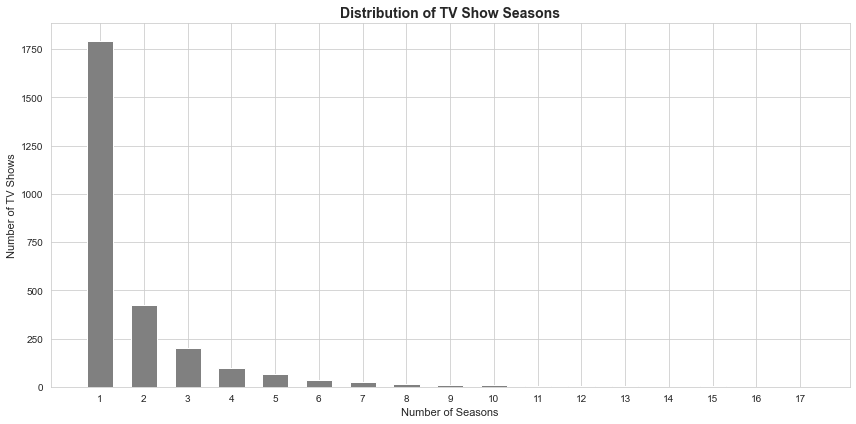


=== TV Show Statistics ===
Average seasons: 1.8
Most common: 1 season(s)
Maximum seasons: 17


In [29]:
# TV Show seasons analysis
tv_shows_df = df_clean[df_clean['type'] == 'TV Show'].copy()
seasons_count = tv_shows_df['duration_value'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(seasons_count.index, seasons_count.values, color='#808080', width=0.6)
plt.xlabel('Number of Seasons', fontsize=11)
plt.ylabel('Number of TV Shows', fontsize=11)
plt.title('Distribution of TV Show Seasons', fontsize=14, fontweight='bold')
plt.xticks(range(1, int(seasons_count.index.max()) + 1))
plt.tight_layout()
plt.savefig('../images/tv_show_seasons.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== TV Show Statistics ===")
print(f"Average seasons: {tv_shows_df['duration_value'].mean():.1f}")
print(f"Most common: {tv_shows_df['duration_value'].mode()[0]:.0f} season(s)")
print(f"Maximum seasons: {tv_shows_df['duration_value'].max():.0f}")

## 10. Release Year Analysis

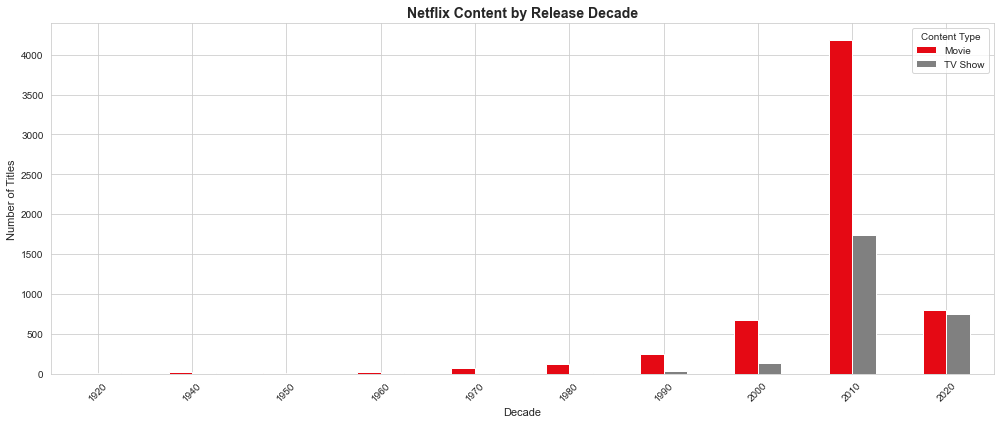

In [30]:
# Content by release year (decade analysis)
df_clean['decade'] = (df_clean['release_year'] // 10) * 10
decade_content = df_clean.groupby(['decade', 'type']).size().unstack(fill_value=0)

decade_content.plot(kind='bar', figsize=(14, 6), color=['#E50914', '#808080'])
plt.title('Netflix Content by Release Decade', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=11)
plt.ylabel('Number of Titles', fontsize=11)
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('../images/decade_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 11. Top Directors and Cast

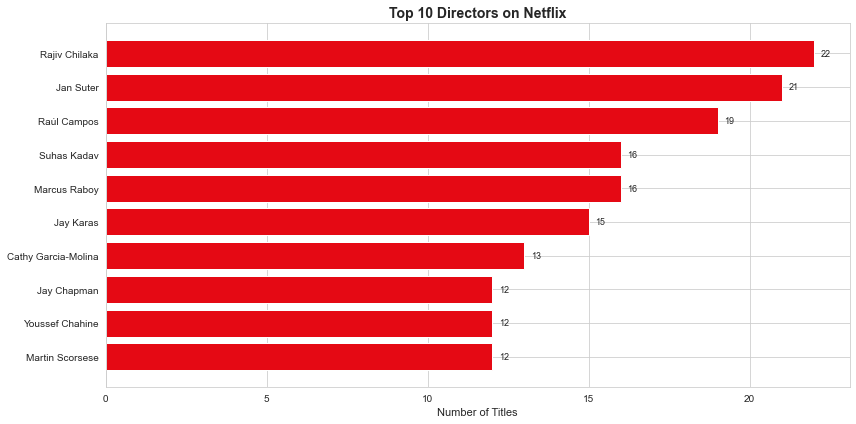


=== Top 10 Directors ===
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64


In [22]:
# Top directors
directors_list = df_clean[df_clean['director'] != 'Unknown']['director'].str.split(', ').explode()
top_directors = directors_list.value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_directors.index, top_directors.values, color='#E50914')
plt.xlabel('Number of Titles', fontsize=11)
plt.title('Top 10 Directors on Netflix', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_directors.values):
    plt.text(v + 0.2, i, str(v), va='center', fontsize=9)
plt.tight_layout()
plt.savefig('../images/top_directors.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Top 10 Directors ===")
print(top_directors)

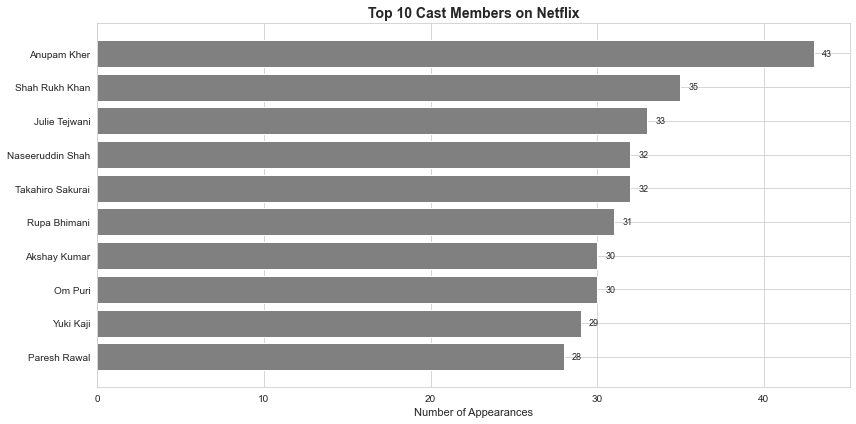


=== Top 10 Cast Members ===
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64


In [31]:
# Top cast members
cast_list = df_clean[df_clean['cast'] != 'Unknown']['cast'].str.split(', ').explode()
top_cast = cast_list.value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_cast.index, top_cast.values, color='#808080')
plt.xlabel('Number of Appearances', fontsize=11)
plt.title('Top 10 Cast Members on Netflix', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_cast.values):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=9)
plt.tight_layout()
plt.savefig('../images/top_cast.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Top 10 Cast Members ===")
print(top_cast)

## 12. Key Insights Summary

In [24]:
print("="*80)
print(" "*20 + "NETFLIX CONTENT ANALYSIS - KEY INSIGHTS")
print("="*80)
print("\n1. CONTENT COMPOSITION:")
print(f"   - Total Titles: {len(df_clean):,}")
print(f"   - Movies: {len(df_clean[df_clean['type']=='Movie']):,} ({len(df_clean[df_clean['type']=='Movie'])/len(df_clean)*100:.1f}%)")
print(f"   - TV Shows: {len(df_clean[df_clean['type']=='TV Show']):,} ({len(df_clean[df_clean['type']=='TV Show'])/len(df_clean)*100:.1f}%)")

print("\n2. TEMPORAL TRENDS:")
print(f"   - Peak Addition Year: {int(peak_year)} ({int(peak_count)} titles)")
print(f"   - Most Active Month: {monthly_content.sum(axis=1).idxmax()}")

print("\n3. GEOGRAPHIC INSIGHTS:")
print(f"   - Top Content Producer: {top_countries.index[0]} ({top_countries.values[0]} titles)")
print(f"   - Top 3 Countries: {', '.join(top_countries.head(3).index.tolist())}")

print("\n4. CONTENT CHARACTERISTICS:")
print(f"   - Most Common Rating: {rating_dist.index[0]} ({rating_dist.values[0]} titles)")
print(f"   - Top Genre: {genre_counts.index[0]} ({genre_counts.values[0]} titles)")
print(f"   - Average Movie Duration: {movies_df['duration_value'].mean():.0f} minutes")
print(f"   - Most TV Shows Have: {tv_shows_df['duration_value'].mode()[0]:.0f} season(s)")

print("\n5. TOP CONTRIBUTORS:")
print(f"   - Most Prolific Director: {top_directors.index[0]} ({top_directors.values[0]} titles)")
print(f"   - Most Featured Actor: {top_cast.index[0]} ({top_cast.values[0]} appearances)")

print("\n" + "="*80)
print(" "*25 + "Analysis Complete!")
print("="*80)

                    NETFLIX CONTENT ANALYSIS - KEY INSIGHTS

1. CONTENT COMPOSITION:
   - Total Titles: 8,807
   - Movies: 6,131 (69.6%)
   - TV Shows: 2,676 (30.4%)

2. TEMPORAL TRENDS:
   - Peak Addition Year: 2019 (2016 titles)
   - Most Active Month: July

3. GEOGRAPHIC INSIGHTS:
   - Top Content Producer: United States (3211 titles)
   - Top 3 Countries: United States, India, United Kingdom

4. CONTENT CHARACTERISTICS:
   - Most Common Rating: TV-MA (3207 titles)
   - Top Genre: International Movies (2752 titles)
   - Average Movie Duration: 100 minutes
   - Most TV Shows Have: 1 season(s)

5. TOP CONTRIBUTORS:
   - Most Prolific Director: Rajiv Chilaka (22 titles)
   - Most Featured Actor: Anupam Kher (43 appearances)

                         Analysis Complete!
